In [41]:
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv("2008.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**1**. Какая из причин отмены рейса (CancellationCode) была самой частой?

In [43]:
# Подсчет количества каждой причины отмены рейса
cancellation_race = data['CancellationCode'].value_counts()

# Определение самой частой причины отмены рейса
most_common_cancellation_code = cancellation_race.idxmax()

print(f"Самая частая причина отмены рейса: {most_common_cancellation_code}")

Самая частая причина отмены рейса: A


**Ответ**: A = carrier

**2**. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [44]:
distance = data["Distance"]
print ('Среднее расстояние:', int(distance.mean()))
print ('Минимальное расстояние:', distance.min())
print ('Максимальное расстояние:', distance.max())

Среднее расстояние: 724
Минимальное расстояние: 31
Максимальное расстояние: 4962


**3**. Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [45]:
list1 = ["Year", "Month", "DayofMonth", "FlightNum", "UniqueCarrier"]
list2 = ["FlightNum", "UniqueCarrier", "Distance"]

# извлечение набора данных days с помощью фильтрации по минимальному значению, удаление дубликатов
days = data[distance == distance.min()][list1].drop_duplicates()
print(days)

flights = data[distance == distance.min()][["FlightNum", "UniqueCarrier"]].drop_duplicates()

# функция принимает набор данных о рейсах и возвращает логическое выражение для фильтрации данных по конкретному рейсу
get_other_flights = lambda flight: \
    np.logical_and(data["FlightNum"] == flight[0], data["UniqueCarrier"] == flight[1])
[data[get_other_flights(flight)][list2].drop_duplicates() for flight in flights.values]

       Year  Month  DayofMonth  FlightNum UniqueCarrier
1116   2008     12          30         65            AS
6958   2008     12          26         65            AS
17349  2008      8          18         64            AS
27534  2008      3          11         64            AS
46082  2008      8           9         65            AS
48112  2008      2          28         64            AS


[       FlightNum UniqueCarrier  Distance
 1116          65            AS        31
 1517          65            AS       680
 6326          65            AS        82
 10113         65            AS       571
 43132         65            AS       123,
        FlightNum UniqueCarrier  Distance
 1389          64            AS       680
 3869          64            AS        82
 4466          64            AS       123
 17349         64            AS        31
 43353         64            AS       571]

**Ответ:** Минимальное расстояние было совершено 30 декабря (65 рейс) и 18 августа (64 рейс).

**4**. Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [46]:
# Подсчет количества вылетов из каждого аэропорта
departure_counts = data['Origin'].value_counts()

# Нахождение аэропорта с наибольшим количеством вылетов
airport_with_most_departures = departure_counts.idxmax()

print('Аэропорт, из которого было произведено больше всего вылетов:', airport_with_most_departures)


Аэропорт, из которого было произведено больше всего вылетов: ATL


**Ответ**: Международный аэропорт Хартсфилд-Джексон Атланта расположен в городе Атланта, Джорджия, США.

**5**. Найдите для каждого аэропорта среднее время полета (AirTime) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [47]:
# Группировка данных по аэропортам вылета и вычисление среднего времени полета
average_airtime_by_origin = data.groupby('Origin')['AirTime'].mean()

# Нахождение аэропорта с наибольшим средним временем полета
airport_with_longest_average_airtime = average_airtime_by_origin.idxmax()
longest_average_airtime = average_airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полета: {airport_with_longest_average_airtime}")
print(f"Среднее время полета в этом аэропорте: {int(longest_average_airtime)} минут")

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета в этом аэропорте: 205 минут


**6**. Найдите аэропорт, у которого наибольшая доля задержанных (DepDelay > 0) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию filter после groupby).

In [48]:
# Группировка данных по аэропортам вылета
grouped = data.groupby('Origin')

# Фильтрация аэропортов с числом рейсов менее 1000
filtered_grouped = grouped.filter(lambda x: len(x) >= 1000)

# Вычисление доли задержанных рейсов для каждого аэропорта
delayed_flights_by_origin = filtered_grouped.groupby('Origin')['DepDelay'].apply(lambda x: (x > 0).mean())

# Нахождение аэропорта с наибольшей долей задержанных рейсов
airport_with_highest_delay_rate = delayed_flights_by_origin.idxmax()
highest_delay_rate = delayed_flights_by_origin.max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {airport_with_highest_delay_rate}")
print(f"Доля задержанных рейсов в этом аэропорте: {highest_delay_rate}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов в этом аэропорте: 0.5111591072714183


**Линейная регрессия**

**7**. Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:

Имеются ли в данных пропущенные значения?
Сколько всего пропущенных элементов в таблице "объект-признак"?
Сколько объектов имеют хотя бы один пропуск?
Сколько признаков имеют хотя бы одно пропущенное значение?

In [49]:
# Проверка на наличие пропущенных значений в данных
has_missing_values = data.isnull().values.any()

# Подсчет общего количества пропущенных элементов в таблице
total_missing_values = data.isnull().sum().sum()

# Подсчет количества объектов с хотя бы одним пропуском
objects_with_missing = data.isnull().any(axis=1).sum()

# Подсчет количества признаков с хотя бы одним пропущенным значением
features_with_missing = data.isnull().any(axis=0).sum()

print('Проверка на наличие пропущенных значений в данных:', has_missing_values)
print('Подсчет общего количества пропущенных элементов в таблице:', total_missing_values)
print('Подсчет количества объектов с хотя бы одним пропуском:', objects_with_missing)
print('Подсчет количества признаков с хотя бы одним пропущенным значением:', features_with_missing)

Проверка на наличие пропущенных значений в данных: True
Подсчет общего количества пропущенных элементов в таблице: 355215
Подсчет количества объектов с хотя бы одним пропуском: 70000
Подсчет количества признаков с хотя бы одним пропущенным значением: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:

Имеются ли пропущенные значения в целевой переменной?
Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.
Исключите из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [50]:
# Проверка наличия пропущенных значений в DepDelay
print("Пропущенные значения в DepDelay:", data['DepDelay'].isnull().any())

# Анализ объектов с пропущенными значениями в DepDelay
if data['DepDelay'].isnull().any():
    missing_dep_delay_data = data[data['DepDelay'].isnull()]
    print("Анализ объектов с пропущенными DepDelay:")
    print(missing_dep_delay_data.describe())

# Исключение объектов с пропущенным DepDelay и DepDelay равным 0
data_clean = data.dropna(subset=['DepDelay'])
data_clean = data_clean[data_clean['DepDelay'] != 0]

# Выделение целевой переменной и исключение её из матрицы признаков
target_vector = data_clean['DepDelay']
features_matrix = data_clean.drop(columns=['DepDelay'])


Пропущенные значения в DepDelay: True
Анализ объектов с пропущенными DepDelay:
         Year        Month   DayofMonth    DayOfWeek  DepTime   CRSDepTime  \
count  1399.0  1399.000000  1399.000000  1399.000000      0.0  1399.000000   
mean   2008.0     5.646891    15.562545     3.987848      NaN  1379.989993   
std       0.0     3.705114     8.585107     2.018653      NaN   462.847110   
min    2008.0     1.000000     1.000000     1.000000      NaN    50.000000   
25%    2008.0     2.000000     9.000000     2.000000      NaN  1000.000000   
50%    2008.0     5.000000    15.000000     4.000000      NaN  1420.000000   
75%    2008.0     9.000000    22.000000     6.000000      NaN  1755.000000   
max    2008.0    12.000000    31.000000     7.000000      NaN  2359.000000   

       ArrTime   CRSArrTime    FlightNum  ActualElapsedTime  ...     Distance  \
count      0.0  1399.000000  1399.000000                0.0  ...  1399.000000   
mean       NaN  1543.809149  2789.937098                

**Ответ:**
Пропуски в данных о задержках могут быть вызваны различными причинами, например:

Отмена рейса, что делает данные о задержке вылета неактуальными.
Ошибки ввода или сбои в системе сбора данных.

Объединяющие факторы:
Необходимо проанализировать дополнительные признаки, такие как статус отмены (Cancelled) и причина отмены (CancellationCode), чтобы понять, можно ли исключить какие-то признаки из анализа. Если все пропущенные значения связаны с отмененными рейсами, можно рассмотреть возможность исключения этих признаков, так как они не несут информации о реальных задержках.

**8**. Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName_Hour, FeatureName_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [51]:
def split_time(df, time_col):
    # Создание столбцов для часов и минут с исходными NaN значениями
    df[time_col + '_Hour'] = np.nan
    df[time_col + '_Minute'] = np.nan

    # Обработка только тех строк, где есть ненулевое значение времени
    notnull_time = df[time_col].dropna()

    # Заполнение новых столбцов
    df.loc[notnull_time.index, time_col + '_Hour'] = notnull_time // 100
    df.loc[notnull_time.index, time_col + '_Minute'] = notnull_time % 100

# Применяем функцию ко всем временным столбцам
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature in time_features:
    split_time(data, feature)

    # Удаление исходного временного признака
    data.drop(columns=[feature], inplace=True)

print(data[['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']].head())

   DepTime_Hour  DepTime_Minute  CRSDepTime_Hour  CRSDepTime_Minute  \
0          21.0            11.0             20.0               55.0   
1          14.0            26.0             14.0               10.0   
2          11.0            43.0             11.0               45.0   
3          11.0            41.0             11.0               44.0   
4           8.0            15.0              8.0               20.0   

   ArrTime_Hour  ArrTime_Minute  CRSArrTime_Hour  CRSArrTime_Minute  
0          23.0             8.0             23.0                0.0  
1          17.0            30.0             17.0               28.0  
2          15.0             1.0             15.0               20.0  
3          13.0            23.0             13.0               35.0  
4          12.0            43.0             13.0                0.0  


**9**. Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

**Ответ:**
Признаки, которые сильно коррелируют с целевой переменной или содержат информацию, позволяющую предсказать цель, следует исключить, чтобы модель могла обучаться на более независимой основе и лучше обобщать на новых данных.

Целевой переменной является DepDelay, которая описывает задержку вылета рейса. Признаки, которые могут содержать прямую информацию о задержке и следовательно, сильно коррелируют с DepDelay:

ArrDelay – задержка прибытия. Очевидно, если рейс задерживается при вылете, это часто влияет на время прибытия.
ActualElapsedTime, AirTime – эти параметры также связаны с временем полета и могут быть непрямо связаны с задержками.
TaxiOut – время, проведенное в такси после полета, может коррелировать с задержками вылета.
TailNum – номер хвоста самолета, который больше касается уникальности самолета, и может не вносить полезный вклад в модель для предсказания задержек.
Year –  не играет существенной роли в предсказании задержек.

In [52]:
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'AirTime', 'TaxiOut', 'TailNum', 'Year']
data = data.drop(columns=features_to_drop)


**10**. Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

In [59]:
import matplotlib.pyplot as plt

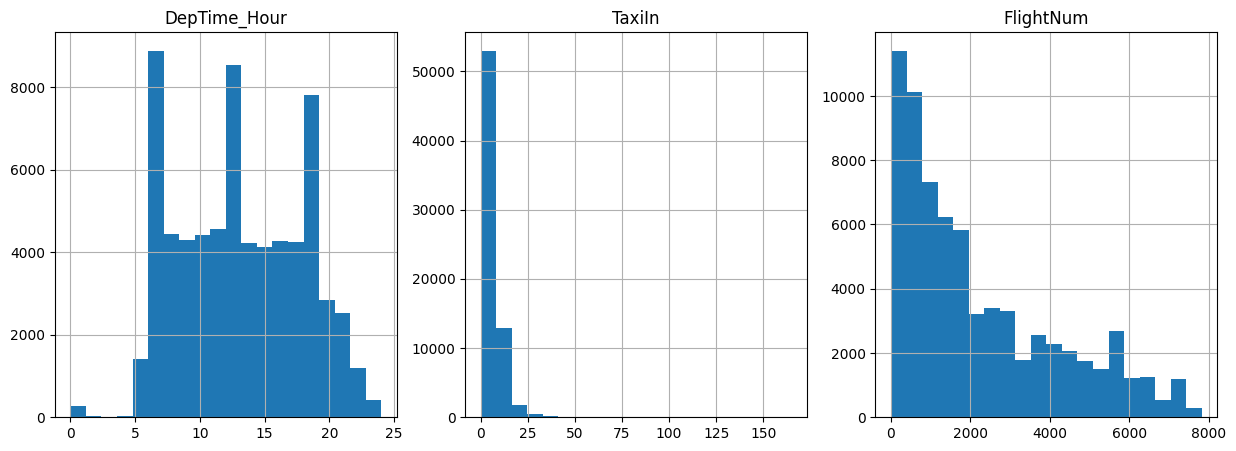

In [60]:
# Построение гистограмм для трех признаков
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
data['DepTime_Hour'].hist(bins=20)
plt.title('DepTime_Hour')

plt.subplot(1, 3, 2)
data['TaxiIn'].hist(bins=20)
plt.title('TaxiIn')

plt.subplot(1, 3, 3)
data['FlightNum'].hist(bins=20)
plt.title('FlightNum')

plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Ответ**:

Различный диапазон значений. Это может привести к тому, что признаки с большими значениями будут оказывать более сильное влияние на процесс обучения модели.
Масштабирование уравнивает диапазоны значений, делая признаки равнозначными в контексте их вклада.

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:

Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
Масштабирование вещественных признаков с помощью StandardScaler.
One-hot-кодирование категориальных признаков с помощью DictVectorizer или функции pd.get_dummies.
Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [61]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    # Определяем категориальные и вещественные признаки
    categorical_features = data.select_dtypes(include=['object', 'category']).columns
    numerical_features = data.select_dtypes(include=['number']).columns

    # Замена пропущенных значений
    data[categorical_features] = data[categorical_features].fillna('nan')
    data[numerical_features] = data[numerical_features].fillna(0)

    # Масштабирование вещественных признаков
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    # One-hot-кодирование категориальных признаков
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    return data


In [64]:
transformed_data = transform_data(data)

# Вывод количества признаков после преобразования
print("Количество признаков после преобразования:", transformed_data.shape[1])

Количество признаков после преобразования: 639


**11**. Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию train_test_split).

In [65]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = data.drop('DepDelay', axis=1)
y = data['DepDelay']

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вывод размеров полученных выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (49000, 26)
Размер тестовой выборки: (21000, 26)


**12**. Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения MSE и R^2 на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

Подсказка: изучите значения полученных коэффициентов w, сохраненных в атрибуте coef_ объекта LinearRegression.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разбиение данных на признаки и целевую переменную уже из преобразованного датасета
X_transformed = transformed_data.drop('DepDelay', axis=1)
y_transformed = transformed_data['DepDelay']

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.3, random_state=42)

# Выборка 1000 объектов из обучающей выборки
X_train_subsample = X_train[:1000]
y_train_subsample = y_train[:1000]

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_subsample, y_train_subsample)

# Предсказания модели на подвыборке и на контрольной выборке
y_pred_train = model.predict(X_train_subsample)
y_pred_test = model.predict(X_test)

# Вычисление MSE и R^2 для обучающей подвыборки
mse_train = mean_squared_error(y_train_subsample, y_pred_train)
r2_train = r2_score(y_train_subsample, y_pred_train)

# Вычисление MSE и R^2 для тестовой выборки
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Вывод результатов
print("Обучающая подвыборка - MSE: {:.2f}, R^2: {:.2f}".format(mse_train, r2_train))
print("Тестовая выборка - MSE: {:.2f}, R^2: {:.2f}".format(mse_test, r2_test))


Обучающая подвыборка - MSE: 0.05, R^2: 0.94
Тестовая выборка - MSE: 133223977120251922849202176.00, R^2: -125672186961475744185712640.00


**Ответ:**

MSE (Mean Squared Error): Чем ниже значение, тем ближе предсказания модели к фактическим данным.
R^2 (Coefficient of Determination): Значение близкое к 1 указывает на высокую точность модели.


Очень маленький MSE и очень высокий R^2 на обучающей подвыборке: Это может указывать на то, что модель хорошо работает на ограниченном наборе данных (1000 объектов), с которым она была обучена.

Экстремально высокий MSE и отрицательный R^2 на тестовой выборке: Это явно указывает на проблему переобучения. Модель, которая показывает хорошие результаты на обучающих данных, полностью теряет способность к обобщению на новых данных. Отрицательный R^2 показывает, что модель работает хуже, чем простое предсказание среднего значения целевой переменной.

**13**. Обучение линейной регрессии.
Обучите линейную регрессию с L1(Lasso) и L2(Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от 10:^3 до 10^3). Согласуются ли результаты с вашими ожиданиями?

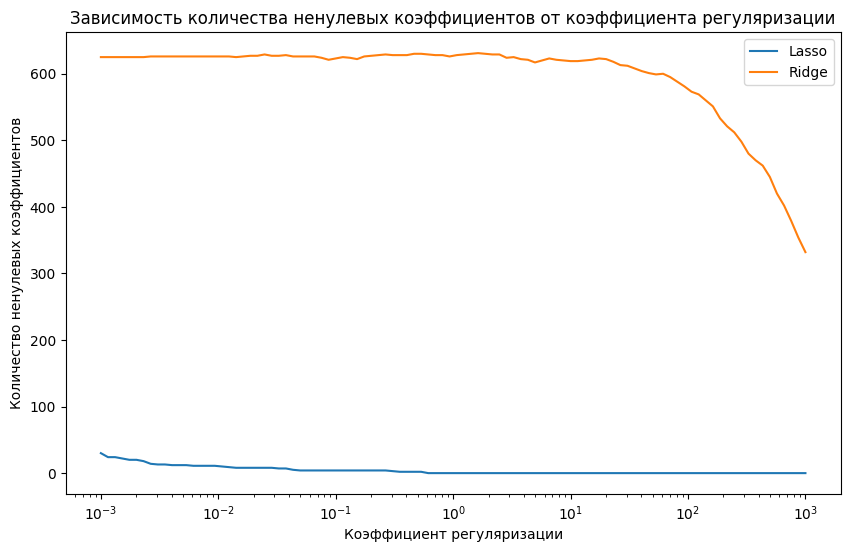

In [71]:
from sklearn.linear_model import Lasso, Ridge
import numpy as np
import matplotlib.pyplot as plt

# Значения коэффициентов регуляризации
alphas = np.logspace(-3, 3, 100)

# Списки для хранения количеств ненулевых коэффициентов
non_zeros_lasso = []
non_zeros_ridge = []

# Порог для определения "нулевых" коэффициентов
zero_threshold = 1e-3

for alpha in alphas:
    # Создаем модели с текущим значением alpha
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)

    # Обучаем модели
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    # Считаем количество коэффициентов, которые не равны нулю
    non_zeros_lasso.append(np.sum(np.abs(lasso.coef_) > zero_threshold))
    non_zeros_ridge.append(np.sum(np.abs(ridge.coef_) > zero_threshold))

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(alphas, non_zeros_lasso, label='Lasso')
plt.plot(alphas, non_zeros_ridge, label='Ridge')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Зависимость количества ненулевых коэффициентов от коэффициента регуляризации')
plt.legend()
plt.show()


Посчитайте для Ridge-регрессии следующие метрики: RMSE, MAE, R^2.

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создаем и обучаем Ridge-регрессию
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = ridge_model.predict(X_test)

# Вычисляем метрики
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False для RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 0.29597402595811423
MAE: 0.18035915838749272
R^2: 0.9173650101093074


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от 10^−3 до 10^3 ) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты LassoCV, RidgeCV и KFold.

In [74]:
from sklearn.model_selection import GridSearchCV, KFold

Лучшее значение alpha: 14.563484775012444


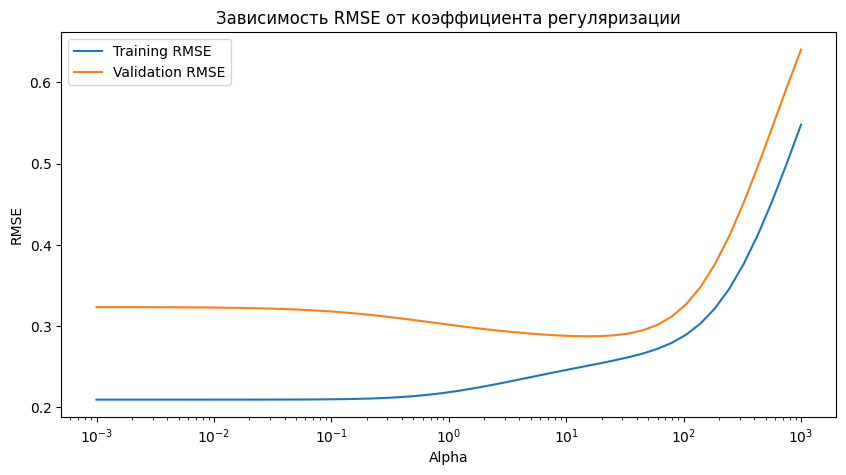

Итоговые метрики для Ridge с оптимальным alpha:
RMSE: 0.33285020862443826
MAE: 0.18332199465065188
R^2: 0.8954908187655204


In [75]:
# Выборка 1000 объектов для обучения
X_train_sample = X_train[:1000]
y_train_sample = y_train[:1000]

# Создаем объект KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Задаем диапазон для коэффициента регуляризации
alpha_range = np.logspace(-3, 3, 50)

# Параметры для GridSearchCV
param_grid = {'alpha': alpha_range}

# Модель Ridge регрессии
ridge = Ridge()

# GridSearch с кросс-валидацией
grid = GridSearchCV(ridge, param_grid, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(X_train_sample, y_train_sample)

# Вывод лучшего значения alpha
print("Лучшее значение alpha:", grid.best_params_['alpha'])

# Результаты
results = grid.cv_results_

# Графики для RMSE
plt.figure(figsize=(10, 5))
plt.semilogx(results['param_alpha'].data, np.sqrt(-results['mean_train_score']), label='Training RMSE')
plt.semilogx(results['param_alpha'].data, np.sqrt(-results['mean_test_score']), label='Validation RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.title('Зависимость RMSE от коэффициента регуляризации')
plt.show()

# Обучаем лучшую модель
best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test)

# Метрики
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Итоговые метрики для Ridge с оптимальным alpha:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

**14**. Поиск объектов-выбросов

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

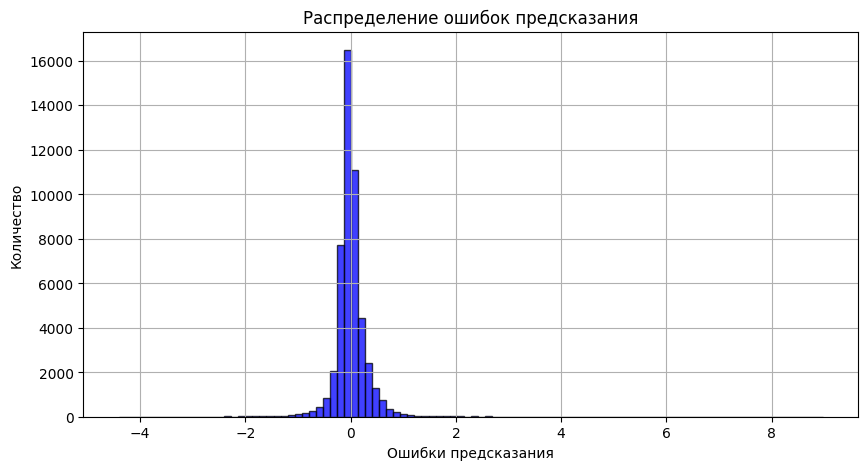

MSE: 0.08995557570620982


In [76]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# Создание объекта для модели линейной регрессии
model = Ridge(alpha=grid.best_params_['alpha'])

# Предсказания с использованием кросс-валидации
y_pred_oof = cross_val_predict(model, X_train, y_train, cv=kf)

# Вычисление ошибок
errors = y_train - y_pred_oof

# Построение гистограммы ошибок
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=100, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('Ошибки предсказания')
plt.ylabel('Количество')
plt.title('Распределение ошибок предсказания')
plt.grid(True)
plt.show()

# Вычисление MSE
mse = mean_squared_error(y_train, y_pred_oof)
print(f"MSE: {mse}")


**Ответ:**

Полученное значение MSE, равное приблизительно 0.09, свидетельствует о том, что средняя квадратичная ошибка предсказаний модели относительно истинных значений не очень велика, что может быть хорошим знаком в контексте использованной модели и данных.